# Chi-square test in Machine Learning
Chi-Square test is a statistical method crucial for analyzing associations in categorical data. Its applications span various fields, aiding researchers in understanding relationships between factors. This article elucidates Chi-Square types, steps for implementation, and its role in feature selection, exemplified through Python code on the Iris dataset.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as stats 

In [2]:
# Degrees of freedom and significance level 
df = 2
alpha = 0.05

In [3]:
# Critical value from the Chi-Square distribution table 
critical_value = stats.chi2.ppf(1 - alpha, df) 
critical_value

5.991464547107979

# Visualize the Chi-Square Distribution and Critical Region

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as stats 

In [5]:
df = 2
alpha = 0.05
critical_value = stats.chi2.ppf(1 - alpha, df) 
calculated_chi_square = 3.747

In [6]:
# Generate values for the chi-square distribution 
x = np.linspace(0, 10, 1000) 
y = stats.chi2.pdf(x, df) 

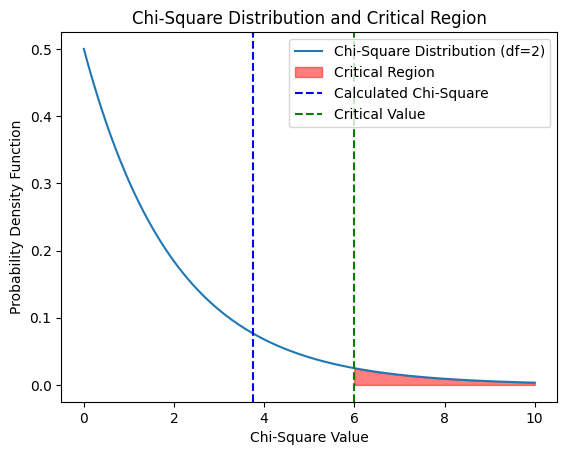

In [7]:
plt.plot(x, y, label='Chi-Square Distribution (df=2)') 
plt.fill_between(x, y, where=(x > critical_value), color='red', alpha=0.5, label='Critical Region') 
plt.axvline(calculated_chi_square, color='blue', linestyle='dashed', label='Calculated Chi-Square') 
plt.axvline(critical_value, color='green', linestyle='dashed', label='Critical Value') 
plt.title('Chi-Square Distribution and Critical Region') 
plt.xlabel('Chi-Square Value') 
plt.ylabel('Probability Density Function') 
plt.legend() 
plt.show()

# Implementation of Chi-Square feature selection

In [8]:
import pandas as pd 
from sklearn.datasets import load_iris 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 

In [9]:
# Load the dataset 
iris = load_iris() 
X = iris.data 
y = iris.target 

In [10]:
# Converting to DataFrame for better visualization 
column_names = [f'feature_{i}' for i in range(X.shape[1])] 
df = pd.DataFrame(X, columns=column_names) 
df['target'] = y 

In [11]:
print("Original Dataset:") 
print(df.head())

Original Dataset:
   feature_0  feature_1  feature_2  feature_3  target
0        5.1        3.5        1.4        0.2       0
1        4.9        3.0        1.4        0.2       0
2        4.7        3.2        1.3        0.2       0
3        4.6        3.1        1.5        0.2       0
4        5.0        3.6        1.4        0.2       0


In [12]:
# Applying Chi-Square feature selection and 
# Selecting top k features 
k = 2 
chi2_selector = SelectKBest(chi2, k=k) 
X_new = chi2_selector.fit_transform(X, y)

In [13]:
selected_features = df.columns[:-1][chi2_selector.get_support()] 
print("\nSelected Features:") 
print(selected_features)


Selected Features:
Index(['feature_2', 'feature_3'], dtype='object')
